In [9]:
import psycopg2
import pandas as pd

from config import config

In [10]:
# Establish a connection to the database by creating a cursor object

# Obtain the configuration parameters
params = config()
# Connect to the PostgreSQL database
conn = psycopg2.connect(**params)
# Create a new cursor
cur = conn.cursor()


In [13]:
# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table


In [14]:
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
employees_df = create_pandas_table('select e.emp_no "Employee No", e.first_name "First name", e.last_name "Last name", t.title "Title", s.salary "Salary" from employee e, salary s, title t where e.emp_no = s.emp_no and e.emp_title_id = t.title_id order by "Employee No"')
employees_df


,Employee No,First name,Last name,Title,Salary
0,10001,Georgi,Facello,Senior Engineer,60117.0
1,10002,Bezalel,Simmel,Staff,65828.0
2,10003,Parto,Bamford,Senior Engineer,40006.0
3,10004,Chirstian,Koblick,Senior Engineer,40054.0
4,10005,Kyoichi,Maliniak,Staff,78228.0
...,...,...,...,...,...
300019,499995,Dekang,Lichtner,Engineer,40000.0
300020,499996,Zito,Baaz,Senior Engineer,58058.0
300021,499997,Berhard,Lenart,Senior Engineer,49597.0
300022,499998,Patricia,Breugel,Staff,40000.0


In [15]:
# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()
conn.close()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1470f5550>]],
      dtype=object)

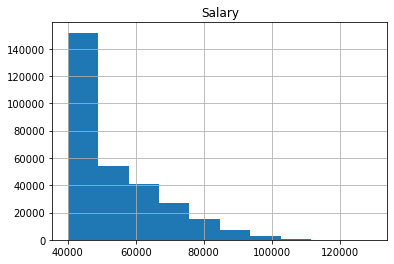

In [18]:
employees_df.hist(column="Salary")


,Employee No,Salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


In [22]:
salaryByTitle = employees_df.groupby(by = 'Title').mean()
salaryByTitle = salaryByTitle.drop(columns=['Employee No'])

,Employee No,Salary
Title,,
Assistant Engineer,252992.595373,48564.434447
Engineer,253654.345919,48535.336511
Manager,110780.833333,51531.041667
Senior Engineer,253038.749885,48506.799871
Senior Staff,254481.798969,58550.172704
Staff,253408.503604,58465.382850
Technique Leader,251811.432730,48582.896092


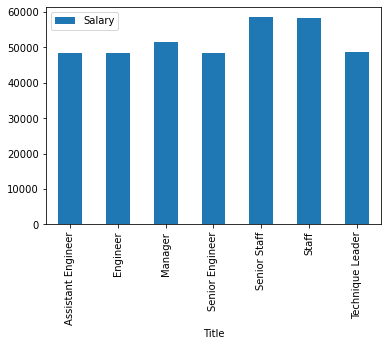

In [26]:
salaryByTitle.plot.bar()